In [89]:
!pip install pandas_datareader

In [90]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [91]:
start_date ='2019-06-01'
end_date ='2020-06-01'
df = data.DataReader('^N225', 'yahoo', start_date, end_date)

In [92]:
df.head()

High           Low          Open         Close  Volume  \
Date                                                                         
2019-06-03  20438.029297  20305.740234  20327.869141  20410.880859   67400   
2019-06-04  20464.570312  20289.640625  20435.859375  20408.539062   69200   
2019-06-05  20800.640625  20646.150391  20667.890625  20776.099609   72300   
2019-06-06  20842.279297  20745.839844  20745.839844  20774.039062   59600   
2019-06-07  20907.769531  20816.580078  20859.779297  20884.710938   50700   

               Adj Close  
Date                      
2019-06-03  20410.880859  
2019-06-04  20408.539062  
2019-06-05  20776.099609  
2019-06-06  20774.039062  
2019-06-07  20884.710938

In [93]:
date = df.index
price = df['Adj Close']

In [94]:
span1 = 5
span2 = 25
span3 = 50
df['span05'] = price.rolling(window=span1).mean()
df['span25'] = price.rolling(window=span2).mean()
df['span50'] = price.rolling(window=span3).mean()

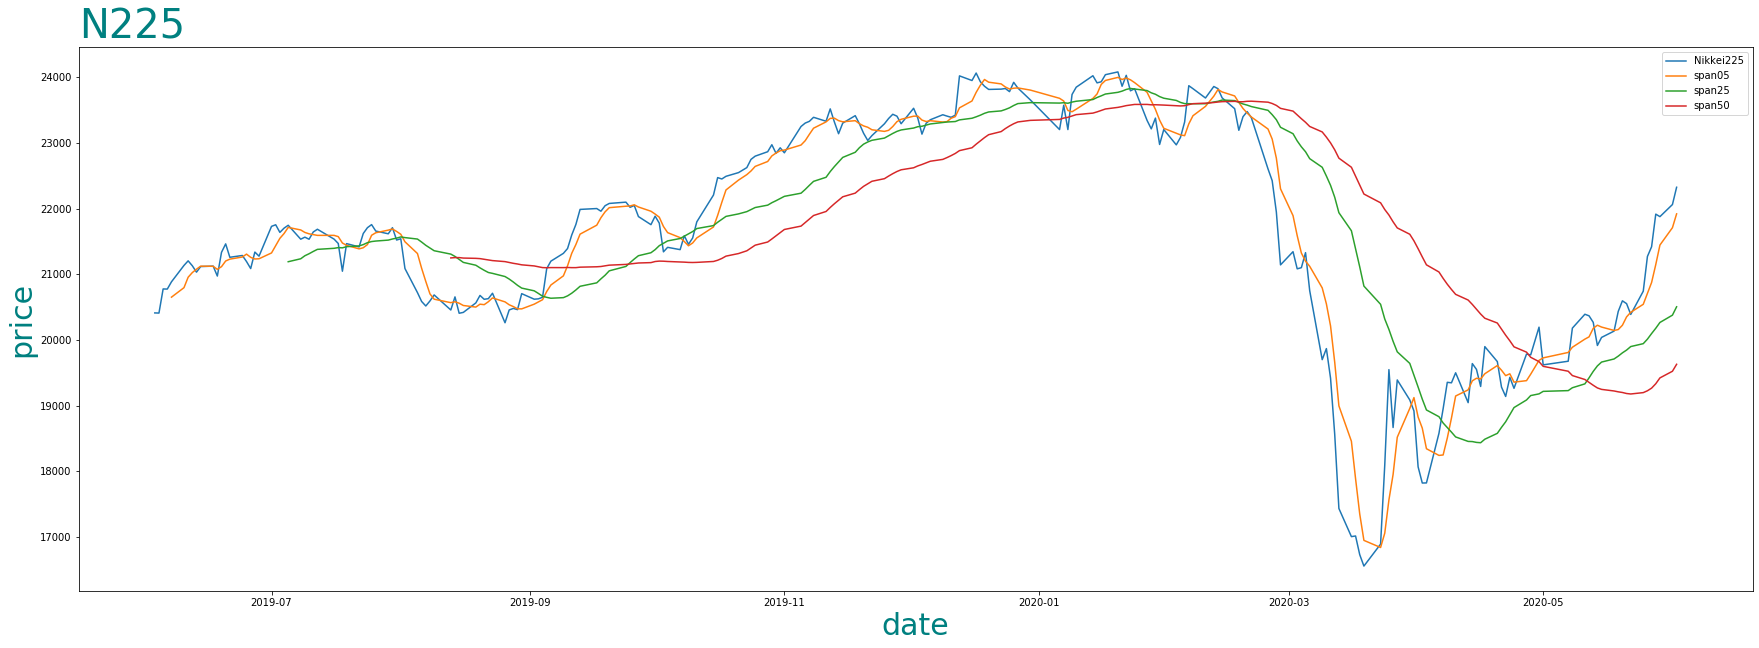

In [95]:
plt.figure(figsize=(30, 10))
plt.plot(date, price, label='Nikkei225')
plt.plot(date, df['span05'], label='span05')
plt.plot(date, df['span25'], label='span25')
plt.plot(date, df['span50'], label='span50')
plt.title('N225', color='teal', size=40, loc='left')
plt.xlabel('date', color='teal', size=30)
plt.ylabel('price', color='teal', size=30)
plt.legend()

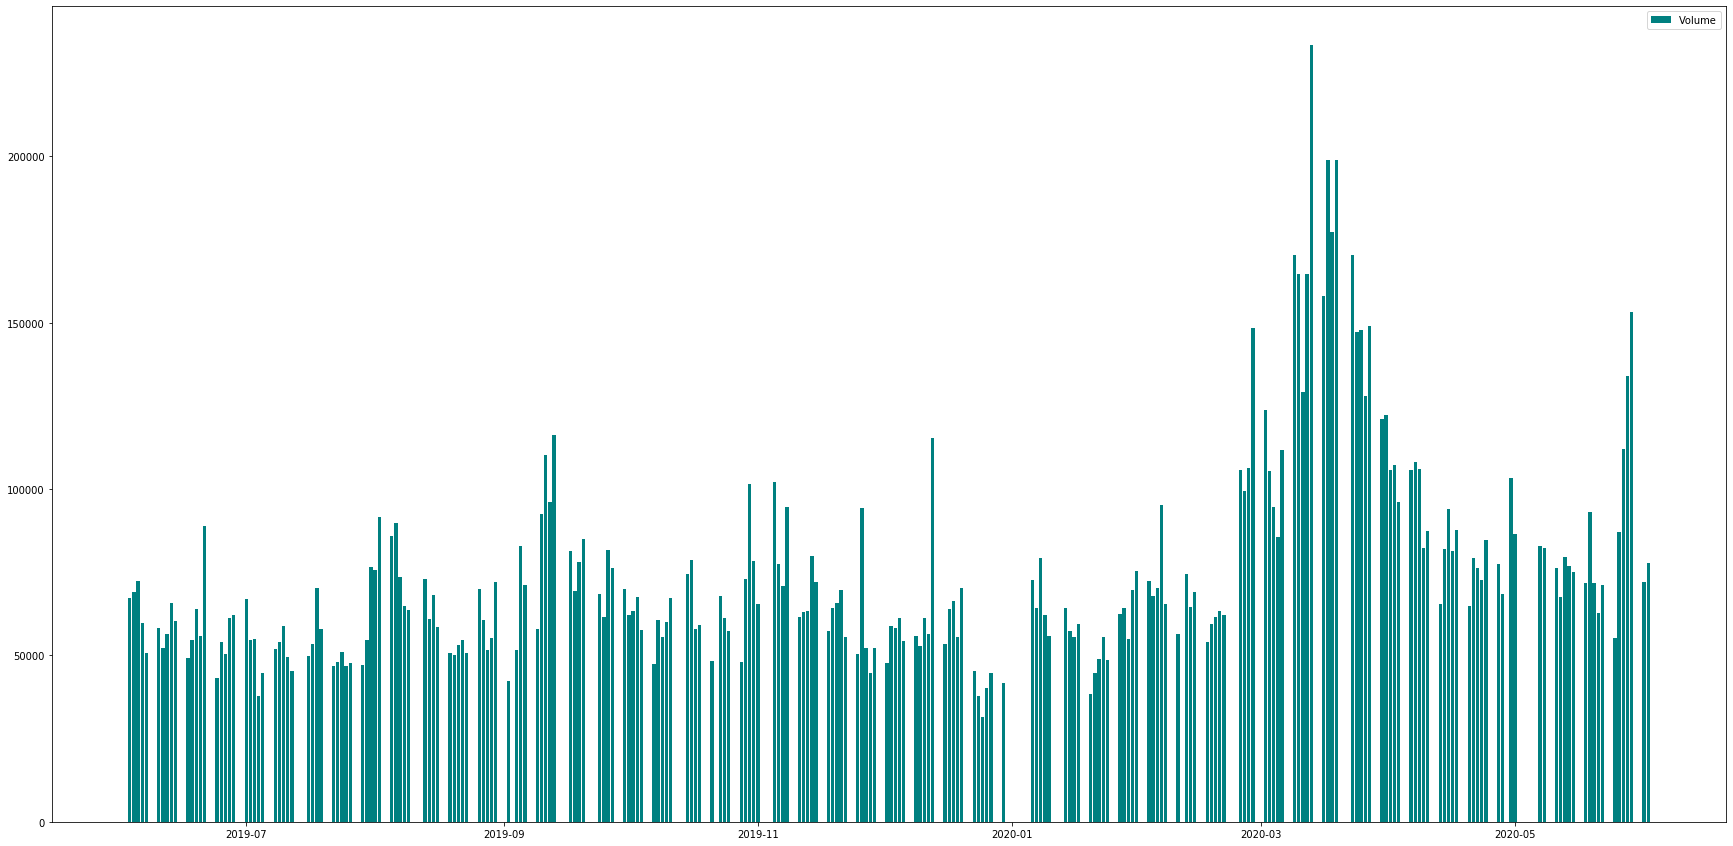

In [96]:
plt.figure(figsize=(30, 15))
plt.bar(date, df['Volume'], label='Volume', color='teal')
plt.legend()

In [97]:
company_code = '4755.JP'
company_name='Rakuten'

In [98]:
df2 = data.DataReader(company_code, 'stooq')

In [107]:
df2 = df.sort_index()
df2 = df2[(df.index>= start_date) & (df.index <= end_date)]
df2

High           Low          Open         Close  Volume  \
Date                                                                         
2019-06-03  20438.029297  20305.740234  20327.869141  20410.880859   67400   
2019-06-04  20464.570312  20289.640625  20435.859375  20408.539062   69200   
2019-06-05  20800.640625  20646.150391  20667.890625  20776.099609   72300   
2019-06-06  20842.279297  20745.839844  20745.839844  20774.039062   59600   
2019-06-07  20907.769531  20816.580078  20859.779297  20884.710938   50700   
...                  ...           ...           ...           ...     ...   
2020-05-26  21328.339844  20918.109375  20927.960938  21271.169922   87200   
2020-05-27  21475.679688  21142.720703  21249.310547  21419.230469  112000   
2020-05-28  21926.289062  21580.500000  21612.900391  21916.310547  134000   
2020-05-29  21955.439453  21710.800781  21807.630859  21877.890625  153200   
2020-06-01  22161.390625  21898.990234  21910.890625  22062.390625   72200   

               Adj Close        span05        span25        span50  
Date                                                                
2019-06-03  20410.880859           NaN           NaN           NaN  
2019-06-04  20408.539062           NaN           NaN           NaN  
2019-06-05  20776.099609           NaN           NaN           NaN  
2019-06-06  20774.039062           NaN           NaN           NaN  
2019-06-07  20884.710938  20650.853906           NaN           NaN  
...                  ...           ...           ...           ...  
2020-05-26  21271.169922  20709.688281  20011.204688  19224.463789  
2020-05-27  21419.230469  20874.504297  20096.365937  19264.527187  
2020-05-28  21916.310547  21147.304297  20177.127969  19331.660781  
2020-05-29  21877.890625  21445.250391  20265.478828  19420.597578  
2020-06-01  22062.390625  21709.398438  20376.743281  19521.804609  

[242 rows x 9 columns]

In [100]:
price2 = df2['Close']
date2 = df2.index

In [121]:
df2['span05'] = price2.rolling(window=span1).mean()
df2['span25'] = price2.rolling(window=span2).mean()
df2['span50'] = price2.rolling(window=span3).mean()

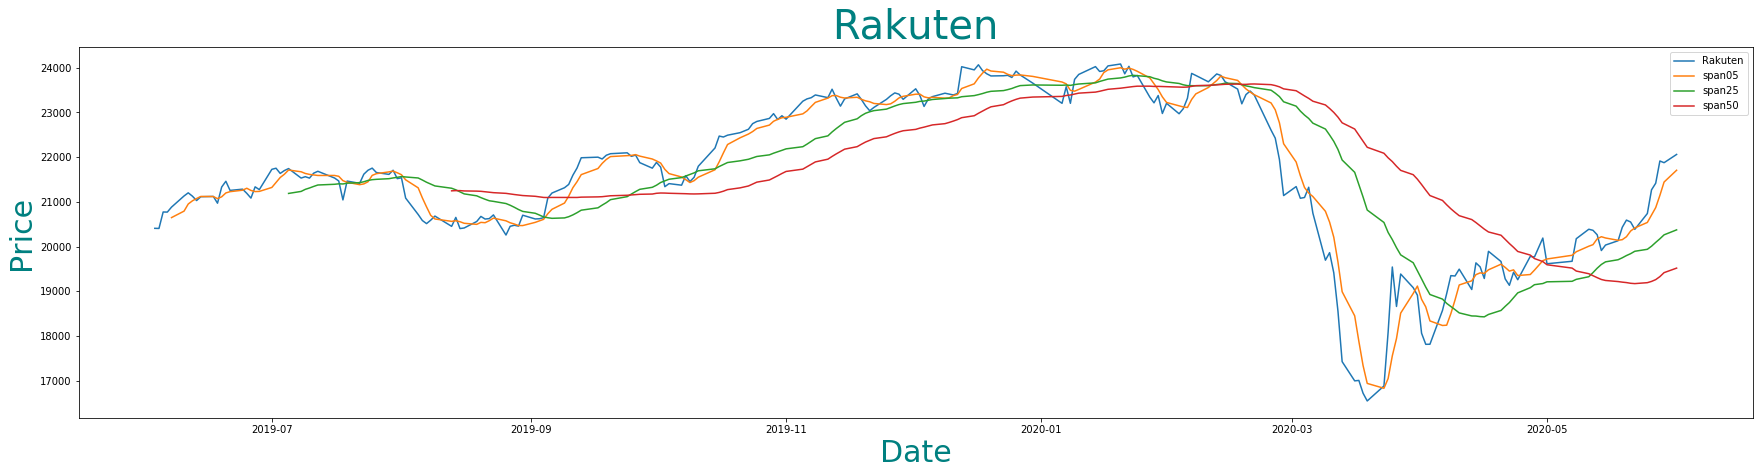

In [142]:
%matplotlib inline
plt.figure(figsize(30, 15))
plt.subplot(2,1,1)
plt.plot(date2, price2, label=company_name)
plt.plot(date2, df2['span05'], label='span05')
plt.plot(date2, df2['span25'], label='span25')
plt.plot(date2, df2['span50'], label='span50')
plt.title(company_name, color='teal', size=40)
plt.xlabel('Date', color='teal', size=30)
plt.ylabel('Price', color='teal', size=30)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(30, 10))
plt.bar(date2, df2['Volume'])